# Assignment Four: 1/8/25

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_excel(r"E:\AIML College\Assignment Four\50_Startups.xlsx")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

<Axes: >

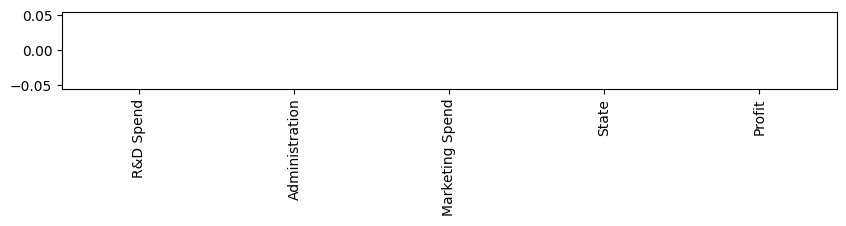

In [8]:
#Checking for null values
df.isnull().sum().plot(kind="bar", figsize=(10,1))

In [9]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
df["Profit"].value_counts()

Profit
192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: count, dtype: int64

In [11]:
df["Profit"].value_counts().sum()

50

In [12]:
#Dropping the first row from the dataset ie: State New York
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [13]:
df = df.drop(0).reset_index(drop=True)
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,162597.70,151377.59,443898.53,California,191792.06
1,153441.51,101145.55,407934.54,Florida,191050.39
2,144372.41,118671.85,383199.62,New York,182901.99
3,142107.34,91391.77,366168.42,Florida,166187.94
4,131876.90,99814.71,362861.36,New York,156991.12


<Axes: xlabel='Profit', ylabel='State'>

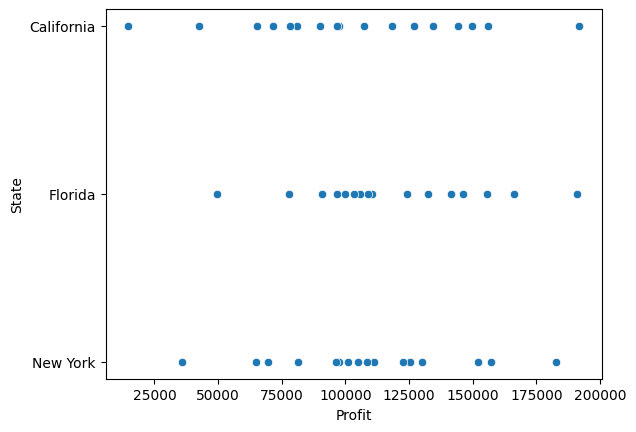

In [14]:
sns.scatterplot(data=df, y="State", x="Profit")

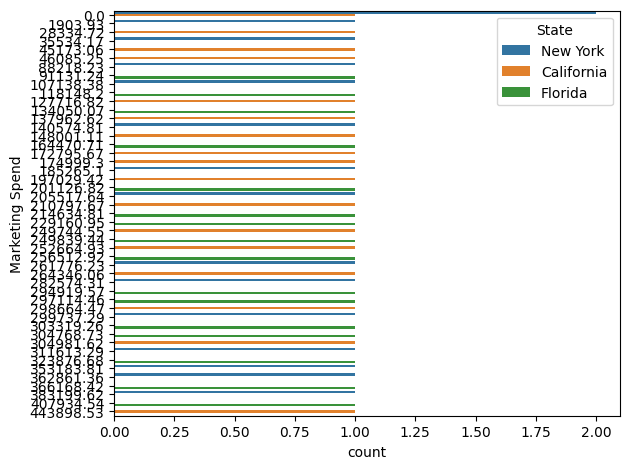

In [15]:
sns.countplot(data=df, y="Marketing Spend", hue="State") #Showing the count of marketing spend for each state
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
state_sales = df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(state_sales, x="State", y="Profit", title="Top 10 States vs Profit", color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.show()
#Florida being the Highest profitable state

<function matplotlib.pyplot.show(close=None, block=None)>

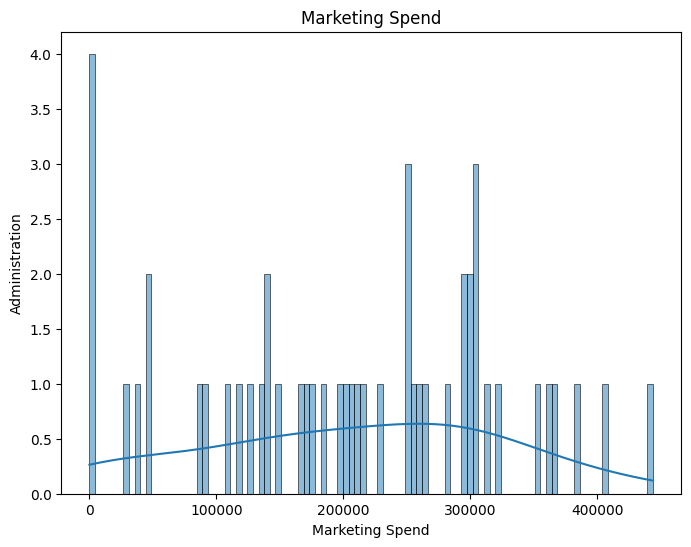

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Marketing Spend', kde=True, bins=100)
plt.title("Marketing Spend")
plt.ylabel("Administration")
plt.show
#Showing the Marketing Spend vs Administration 

In [18]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,162597.70,151377.59,443898.53,California,191792.06
1,153441.51,101145.55,407934.54,Florida,191050.39
2,144372.41,118671.85,383199.62,New York,182901.99
3,142107.34,91391.77,366168.42,Florida,166187.94
4,131876.90,99814.71,362861.36,New York,156991.12


<function matplotlib.pyplot.show(close=None, block=None)>

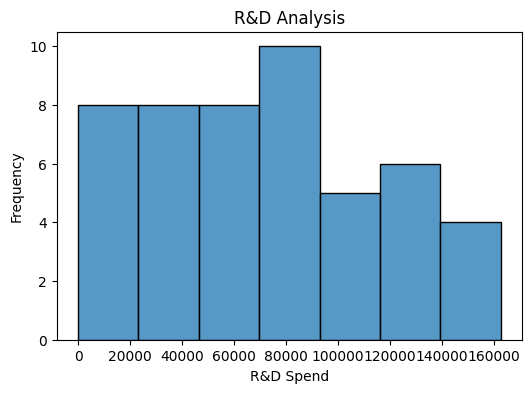

In [19]:
#R&D Analysis
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='R&D Spend')
plt.title("R&D Analysis")
plt.ylabel("Frequency")
plt.show

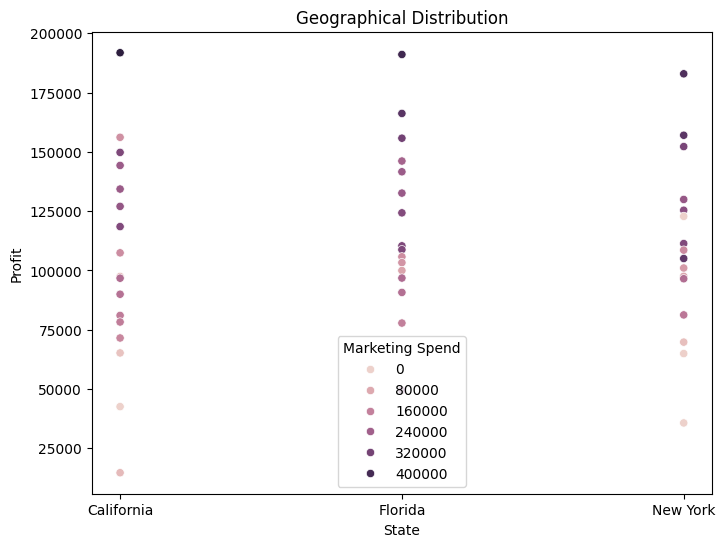

In [20]:
#For Geographical Distribution
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x="State", y="Profit", hue="Marketing Spend")
plt.title("Geographical Distribution")
plt.show()

# Using Linear Regression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,162597.70,151377.59,443898.53,California,191792.06
1,153441.51,101145.55,407934.54,Florida,191050.39
2,144372.41,118671.85,383199.62,New York,182901.99
3,142107.34,91391.77,366168.42,Florida,166187.94
4,131876.90,99814.71,362861.36,New York,156991.12


In [23]:
x = df[["Marketing Spend"]]  
y = df["Profit"]             
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.value_counts().sum()

39

In [25]:
x_train

,Marketing Spend
27,118148.20
39,172795.67
47,0.00
24,137962.62
14,261776.23
29,91131.24
42,35534.17
8,304981.62
3,366168.42
30,88218.23


In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(x_test)

In [28]:
y_pred

array([ 71218.08566145, 114931.14036477, 143541.9917224 , 139178.65827659,
       148848.5766375 , 128183.99020449,  84316.31353838,  61739.50532882,
       118043.36433238, 110494.81459128])

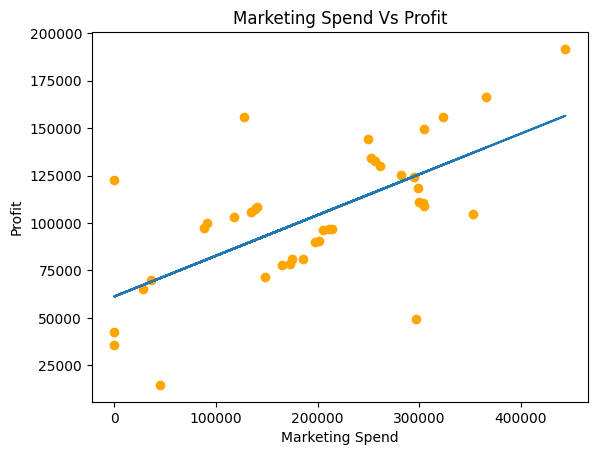

In [29]:
plt.scatter(x_train, y_train, color= "orange")
plt.plot(x_train, regressor.predict(x_train))
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.title("Marketing Spend Vs Profit")
plt.show()